# Demo Notebook for PA1

In [1]:
# Get Dependencies (Kernel Req. Python 3)
import EmotionDetectionHelper as helper
import dataloader as DL
import numpy as np

### 1. Visualization of Eignefaces

('Total number of images:', 80, 'and labels:', 80)


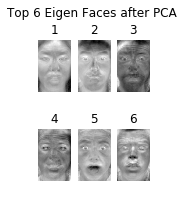

In [2]:
emotion_list = ['h', 'a', 's', 'f', 'd', 'm']  # List of emotions for which to use in PCA
helper.generate_eig_face(emotion_list)

### 2. Logistic Regression

In [ ]:
# Parameters to Change Around
alpha=10e-1  # Learning Rate
model_param_num = 4 # Number of parameters in model
emotion_list = ['f','s'] # Emotions to Classify

# Load the images
data_img, labels = DL.load_data()
data_img = np.asarray(data_img)  # Convert from List to ND-Array

# Convert to Float and Create DataSet Object
data_img = data_img.astype(float)
numImgs, height, width = data_img.shape
cafe_data = helper.DataSet(data_img, labels)

# Get a total list of subjects in the Dataset
peopleList = cafe_data.people[:]

errorList = [] # 10x1 Array of Test Error over the 10 runs
trainingErrorList = [] # 10
holdErrorList = []

for person in peopleList:
    cafe = helper.DataSet(data_img, labels, person, emotionList=emotion_list)  # Select Emotions to run for.
    param_num = model_param_num
    epoch = 10
    logisticTrain = helper.TrainInstance(cafe, param_num, emotionList=emotion_list)  # Select Emotions to run for.
    logisticRegression = helper.LogisticModel(alpha, param_num)
    logisticTrain.batch_gradient_descent(logisticRegression, epoch)

    trainingErrorList.append(logisticTrain.trainErrorList)
    holdErrorList.append(logisticTrain.holdErrorList)

    logisticTrain.get_test_error(logisticRegression)

    print("===================================================")
    print("Test Error is: " + str(logisticTrain.testError))
    print("===================================================")
    errorList.append(logisticTrain.testError)

print('Average Test Error over 10 runs is: ' + str(np.mean(errorList))+ ' (' + str(np.std(errorList)) + ') ')

In [ ]:
# Plot Training & Hold Loss
helper.create_train_plot(epoch, trainingErrorList, holdErrorList, 'Train & Hold Loss alpha: ' + str(alpha) + ' Params: ' + str(model_param_num))

### 3. Softmax Regression

#### 3.1 Softmax Batch Gradient Descent

In [5]:
data_img, labels = DL.load_data()
data_img = np.asarray(data_img)  # Convert from List to ND-Array
#
# # # Convert to Float and Create DataSet Object
data_img = data_img.astype(float)
numImgs, height, width = data_img.shape
cafe_data = helper.DataSet(data_img, labels)

peopleList = cafe_data.people[:]

errorList = []
trainingErrorList = []
holdErrorList = []
emotionList = ['h', 'a', 's', 'f', 'd', 'm']
conf_mat = np.zeros((len(emotionList), len(emotionList)))

for person in peopleList:
    cafe = helper.DataSet(data_img, labels, person, emotionList=emotionList)  # Select Emotions to run for.
    param_num = 30
    epochs = 50
    learning_rate = 10e-1
    softmaxTrain = helper.TrainInstance(cafe, param_num, emotionList=emotionList, softmax=True)  # Select Emotions to run for.
    softMaxRegress = helper.SoftmaxModel(learning_rate, param_num, len(emotionList))
    softmaxTrain.batch_gradient_descent(softMaxRegress, epochs)
    # softmaxTrain.stochastic_gradient_descent(softMaxRegress, epochs)
    trainingErrorList.append(softmaxTrain.trainErrorList)
    holdErrorList.append(softmaxTrain.holdErrorList)

    softmaxTrain.get_test_error(softMaxRegress, softmax=True)

    print("===================================================")
    print("Test Error is: " + str(softmaxTrain.testError))
    print("===================================================")
    errorList.append(softmaxTrain.testError)
    softmaxTrain.gen_conf_mat(softMaxRegress)
    conf_mat = conf_mat + softmaxTrain.conf_mat

print("AVG ERROR: " + str(np.asarray(errorList).mean()) + ' (' + str(np.std(errorList)) + ') ')

('Total number of images:', 80, 'and labels:', 80)
Epoch: 0 Training Error: 1.79121444755 Val Error: 1.8956209832
Epoch: 1 Training Error: 1.13731606373 Val Error: 1.38935738064
Epoch: 2 Training Error: 0.830827056395 Val Error: 1.06106846944
Epoch: 3 Training Error: 0.654713073576 Val Error: 1.08530906351
Epoch: 4 Training Error: 0.539126515623 Val Error: 1.02342620269
Epoch: 5 Training Error: 0.459943909143 Val Error: 1.03877994079
Epoch: 6 Training Error: 0.401435159877 Val Error: 1.05740345051
Epoch: 7 Training Error: 0.356884750854 Val Error: 1.07271828556
Epoch: 8 Training Error: 0.321706589992 Val Error: 1.10425687727
Epoch: 9 Training Error: 0.293117815485 Val Error: 1.12720765719
Epoch: 10 Training Error: 0.269272956215 Val Error: 1.15673398413
Epoch: 11 Training Error: 0.24900608039 Val Error: 1.18296281334
Epoch: 12 Training Error: 0.231536658579 Val Error: 1.20984547243
Epoch: 13 Training Error: 0.216311878057 Val Error: 1.23541200916
Epoch: 14 Training Error: 0.20292166162

Epoch: 0 Training Error: 1.78300536793 Val Error: 1.74144375611
Epoch: 1 Training Error: 1.22249311625 Val Error: 1.09895013417
Epoch: 2 Training Error: 0.926672653729 Val Error: 0.943259898757
Epoch: 3 Training Error: 0.747026428385 Val Error: 0.895242046455
Epoch: 4 Training Error: 0.617125883101 Val Error: 0.786785833427
Epoch: 5 Training Error: 0.522802713463 Val Error: 0.892425587644
Epoch: 6 Training Error: 0.454365171849 Val Error: 0.771031617687
Epoch: 7 Training Error: 0.402926716548 Val Error: 0.849594687106
Epoch: 8 Training Error: 0.36435231924 Val Error: 0.794196885318
Epoch: 9 Training Error: 0.3337708991 Val Error: 0.818959391445
Epoch: 10 Training Error: 0.308422237757 Val Error: 0.805092913566
Epoch: 11 Training Error: 0.286823925136 Val Error: 0.808066116706
Epoch: 12 Training Error: 0.268123036278 Val Error: 0.805116967351
Epoch: 13 Training Error: 0.251745755378 Val Error: 0.804105754481
Epoch: 14 Training Error: 0.237270094332 Val Error: 0.802729202343
Epoch: 15 Tr

Epoch: 0 Training Error: 1.86958000914 Val Error: 1.77599223432
Epoch: 1 Training Error: 1.17616848322 Val Error: 1.10554097788
Epoch: 2 Training Error: 0.869182874619 Val Error: 0.960447219794
Epoch: 3 Training Error: 0.698568373507 Val Error: 0.943774813166
Epoch: 4 Training Error: 0.584854029574 Val Error: 0.905670652594
Epoch: 5 Training Error: 0.504580629234 Val Error: 0.899962326181
Epoch: 6 Training Error: 0.444644881296 Val Error: 0.89483076737
Epoch: 7 Training Error: 0.398276401485 Val Error: 0.896101466407
Epoch: 8 Training Error: 0.360966708073 Val Error: 0.900130029099
Epoch: 9 Training Error: 0.330166210078 Val Error: 0.906258417489
Epoch: 10 Training Error: 0.304260341688 Val Error: 0.913688016708
Epoch: 11 Training Error: 0.282146132649 Val Error: 0.921982796219
Epoch: 12 Training Error: 0.263034340426 Val Error: 0.930725508441
Epoch: 13 Training Error: 0.246343899873 Val Error: 0.939717507467
Epoch: 14 Training Error: 0.231636837286 Val Error: 0.948772595253
Epoch: 15 

Epoch: 0 Training Error: 1.84200960926 Val Error: 1.84040343547
Epoch: 1 Training Error: 1.26135794775 Val Error: 0.912502269566
Epoch: 2 Training Error: 0.961256068004 Val Error: 0.493145079227
Epoch: 3 Training Error: 0.778487782717 Val Error: 0.419019687188
Epoch: 4 Training Error: 0.648499181849 Val Error: 0.287579888238
Epoch: 5 Training Error: 0.546235825874 Val Error: 0.294700385739
Epoch: 6 Training Error: 0.468767772759 Val Error: 0.243538192385
Epoch: 7 Training Error: 0.41187423201 Val Error: 0.252724307442
Epoch: 8 Training Error: 0.369672878267 Val Error: 0.237274977825
Epoch: 9 Training Error: 0.336752850357 Val Error: 0.240828394235
Epoch: 10 Training Error: 0.309791655286 Val Error: 0.238133457315
Epoch: 11 Training Error: 0.28705628234 Val Error: 0.240129815329
Epoch: 12 Training Error: 0.267543280385 Val Error: 0.241453104322
Epoch: 13 Training Error: 0.250589295057 Val Error: 0.243817700218
Epoch: 14 Training Error: 0.23571295018 Val Error: 0.246410248241
Epoch: 15 T

Epoch: 0 Training Error: 1.82222900888 Val Error: 1.74895696201
Epoch: 1 Training Error: 1.16246851207 Val Error: 0.698713762214
Epoch: 2 Training Error: 0.847069563632 Val Error: 0.544538960234
Epoch: 3 Training Error: 0.66809975262 Val Error: 0.467790068265
Epoch: 4 Training Error: 0.552119631727 Val Error: 0.459889775237
Epoch: 5 Training Error: 0.470994589529 Val Error: 0.460428466573
Epoch: 6 Training Error: 0.411108507595 Val Error: 0.467155115912
Epoch: 7 Training Error: 0.365004468104 Val Error: 0.474579926772
Epoch: 8 Training Error: 0.328304032276 Val Error: 0.481824682051
Epoch: 9 Training Error: 0.29834085969 Val Error: 0.487982208788
Epoch: 10 Training Error: 0.273389712088 Val Error: 0.49320121462
Epoch: 11 Training Error: 0.252277004806 Val Error: 0.497538940616
Epoch: 12 Training Error: 0.234174104521 Val Error: 0.501169339277
Epoch: 13 Training Error: 0.218477903587 Val Error: 0.504255559527
Epoch: 14 Training Error: 0.204738051756 Val Error: 0.50693715553
Epoch: 15 Tr

Epoch: 0 Training Error: 1.83806934058 Val Error: 1.68425191965
Epoch: 1 Training Error: 1.1954641804 Val Error: 0.876387176166
Epoch: 2 Training Error: 0.873742101009 Val Error: 0.715408430674
Epoch: 3 Training Error: 0.691864447058 Val Error: 0.683515557744
Epoch: 4 Training Error: 0.574514890853 Val Error: 0.639216464566
Epoch: 5 Training Error: 0.493260283402 Val Error: 0.658707822202
Epoch: 6 Training Error: 0.433109619676 Val Error: 0.645815157238
Epoch: 7 Training Error: 0.386579804056 Val Error: 0.652894918754
Epoch: 8 Training Error: 0.349325029959 Val Error: 0.653652705918
Epoch: 9 Training Error: 0.318737520395 Val Error: 0.656534464328
Epoch: 10 Training Error: 0.293138930088 Val Error: 0.659023799685
Epoch: 11 Training Error: 0.271381965834 Val Error: 0.661545674525
Epoch: 12 Training Error: 0.25265151807 Val Error: 0.664033576302
Epoch: 13 Training Error: 0.236350696872 Val Error: 0.666485952371
Epoch: 14 Training Error: 0.22203181449 Val Error: 0.668914341066
Epoch: 15 T

Epoch: 0 Training Error: 1.85382491042 Val Error: 1.99308932841
Epoch: 1 Training Error: 1.20700964582 Val Error: 1.17002985935
Epoch: 2 Training Error: 0.926239319409 Val Error: 0.944216776513
Epoch: 3 Training Error: 0.761861772041 Val Error: 1.22022467669
Epoch: 4 Training Error: 0.620708942688 Val Error: 0.935955012112
Epoch: 5 Training Error: 0.508101520592 Val Error: 1.24868935645
Epoch: 6 Training Error: 0.427548073354 Val Error: 1.05740387367
Epoch: 7 Training Error: 0.374006439694 Val Error: 1.199195619
Epoch: 8 Training Error: 0.336385607901 Val Error: 1.15219164449
Epoch: 9 Training Error: 0.307575801849 Val Error: 1.20158623101
Epoch: 10 Training Error: 0.283813993954 Val Error: 1.21025800353
Epoch: 11 Training Error: 0.263568368673 Val Error: 1.23440368338
Epoch: 12 Training Error: 0.246040246944 Val Error: 1.25289418012
Epoch: 13 Training Error: 0.23069994086 Val Error: 1.27238893684
Epoch: 14 Training Error: 0.217155818935 Val Error: 1.29092822977
Epoch: 15 Training Erro

Epoch: 0 Training Error: 1.79480772227 Val Error: 1.80482386692
Epoch: 1 Training Error: 1.20428813747 Val Error: 0.774979030633
Epoch: 2 Training Error: 0.908147779197 Val Error: 0.60401842711
Epoch: 3 Training Error: 0.727906675969 Val Error: 0.475695035802
Epoch: 4 Training Error: 0.606997996116 Val Error: 0.457884559808
Epoch: 5 Training Error: 0.520615170074 Val Error: 0.430358445616
Epoch: 6 Training Error: 0.455901171636 Val Error: 0.425161677074
Epoch: 7 Training Error: 0.405623644689 Val Error: 0.420368397966
Epoch: 8 Training Error: 0.365458681571 Val Error: 0.419036246002
Epoch: 9 Training Error: 0.332603359723 Val Error: 0.41826439946
Epoch: 10 Training Error: 0.305201920907 Val Error: 0.417924171388
Epoch: 11 Training Error: 0.281985488009 Val Error: 0.417613141685
Epoch: 12 Training Error: 0.262056272202 Val Error: 0.417293664529
Epoch: 13 Training Error: 0.244759243469 Val Error: 0.416878938392
Epoch: 14 Training Error: 0.2296042475 Val Error: 0.416409591704
Epoch: 15 Tr

Epoch: 0 Training Error: 1.82860271075 Val Error: 1.88033005717
Epoch: 1 Training Error: 1.22435100321 Val Error: 0.923501360126
Epoch: 2 Training Error: 0.919727716396 Val Error: 1.05051463436
Epoch: 3 Training Error: 0.73276449715 Val Error: 0.732444763926
Epoch: 4 Training Error: 0.603514471466 Val Error: 0.963456164664
Epoch: 5 Training Error: 0.496320473734 Val Error: 0.750488494092
Epoch: 6 Training Error: 0.418138212707 Val Error: 0.869997424031
Epoch: 7 Training Error: 0.361816607945 Val Error: 0.782269744601
Epoch: 8 Training Error: 0.321658192289 Val Error: 0.816176759245
Epoch: 9 Training Error: 0.291545862449 Val Error: 0.798093248794
Epoch: 10 Training Error: 0.267087593577 Val Error: 0.801899430876
Epoch: 11 Training Error: 0.246493721788 Val Error: 0.800155913229
Epoch: 12 Training Error: 0.228842079437 Val Error: 0.800386240289
Epoch: 13 Training Error: 0.213535984273 Val Error: 0.800761080846
Epoch: 14 Training Error: 0.200137466673 Val Error: 0.801500181102
Epoch: 15 

Epoch: 0 Training Error: 1.76669580018 Val Error: 1.76059652007
Epoch: 1 Training Error: 1.1800601925 Val Error: 0.846237009135
Epoch: 2 Training Error: 0.875023073296 Val Error: 0.738081466284
Epoch: 3 Training Error: 0.696962807628 Val Error: 0.64343476837
Epoch: 4 Training Error: 0.581893751545 Val Error: 0.646525641278
Epoch: 5 Training Error: 0.503670572374 Val Error: 0.61275737522
Epoch: 6 Training Error: 0.446524295637 Val Error: 0.625290340594
Epoch: 7 Training Error: 0.402405472559 Val Error: 0.612906929113
Epoch: 8 Training Error: 0.367008803842 Val Error: 0.617163403801
Epoch: 9 Training Error: 0.337829000492 Val Error: 0.614793967824
Epoch: 10 Training Error: 0.313265555053 Val Error: 0.615667199066
Epoch: 11 Training Error: 0.292241140965 Val Error: 0.615912645105
Epoch: 12 Training Error: 0.274000173585 Val Error: 0.616612428351
Epoch: 13 Training Error: 0.257995206136 Val Error: 0.61745994959
Epoch: 14 Training Error: 0.243818621856 Val Error: 0.618482059775
Epoch: 15 Tr

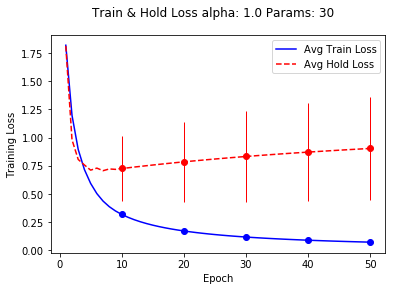

In [6]:
# Plot Train and Hold Loss
helper.create_train_plot(epochs, trainingErrorList, holdErrorList, 'Train & Hold Loss alpha: ' + str(learning_rate) + ' Params: ' + str(param_num))

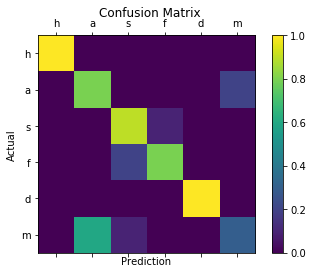

In [7]:
# Show Confusion Matrix
helper.show_conf_mat(conf_mat / len(peopleList), emotionList)

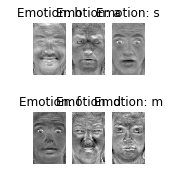

In [8]:
# Visualize Weights
helper.visualize_weights(softmaxTrain.eigComps, softMaxRegress.w_final, emotionList)

#### 3.2 Softmax Stochastic Gradient Descent

In [3]:
data_img, labels = DL.load_data()
data_img = np.asarray(data_img)  # Convert from List to ND-Array
#
# # # Convert to Float and Create DataSet Object
data_img = data_img.astype(float)
numImgs, height, width = data_img.shape
cafe_data = helper.DataSet(data_img, labels)

peopleList = cafe_data.people[:]

errorList = []
trainingErrorList = []
holdErrorList = []
emotionList = ['h', 'a', 's', 'f', 'd', 'm']
conf_mat = np.zeros((len(emotionList), len(emotionList)))

for person in peopleList:
    cafe = helper.DataSet(data_img, labels, person, emotionList=emotionList)  # Select Emotions to run for.
    param_num = 30
    epochs = 50
    learning_rate = 10e-1
    softmaxTrain = helper.TrainInstance(cafe, param_num, emotionList=emotionList, softmax=True)  # Select Emotions to run for.
    softMaxRegress = helper.SoftmaxModel(learning_rate, param_num, len(emotionList))
    softmaxTrain.stochastic_gradient_descent(softMaxRegress, epochs)
    trainingErrorList.append(softmaxTrain.trainErrorList)
    holdErrorList.append(softmaxTrain.holdErrorList)

    softmaxTrain.get_test_error(softMaxRegress, softmax=True)

    print("===================================================")
    print("Test Error is: " + str(softmaxTrain.testError))
    print("===================================================")
    errorList.append(softmaxTrain.testError)
    softmaxTrain.gen_conf_mat(softMaxRegress)
    conf_mat = conf_mat + softmaxTrain.conf_mat

print("AVG ERROR: " + str(np.asarray(errorList).mean()) + ' (' + str(np.std(errorList)) + ') ')

('Total number of images:', 80, 'and labels:', 80)
Epoch: 0 Training Error: 0.425164314592 Val Error: 1.67521486715
Epoch: 0 Training Error: 0.25070982769 Val Error: 1.68823960161
Epoch: 0 Training Error: 0.270330679216 Val Error: 1.63010455871
Epoch: 0 Training Error: 0.239731742103 Val Error: 1.61457393914
Epoch: 0 Training Error: 0.376674831247 Val Error: 1.55964443795
Epoch: 0 Training Error: 0.246468878151 Val Error: 1.50768628975
Epoch: 0 Training Error: 0.330423926273 Val Error: 1.45748086884
Epoch: 0 Training Error: 0.311292157229 Val Error: 1.43355820374
Epoch: 0 Training Error: 0.41911500528 Val Error: 1.35474211141
Epoch: 0 Training Error: 0.220823668895 Val Error: 1.40217132435
Epoch: 0 Training Error: 0.210412053083 Val Error: 1.38600008777
Epoch: 0 Training Error: 0.30440126133 Val Error: 1.36736667214
Epoch: 0 Training Error: 0.299966952739 Val Error: 1.4214856518
Epoch: 0 Training Error: 0.256852004833 Val Error: 1.39986812181
Epoch: 0 Training Error: 0.35675254367 Val 

Epoch: 15 Training Error: 0.0057142026095 Val Error: 0.769412678521
Epoch: 15 Training Error: 0.0101779169468 Val Error: 0.772938245472
Epoch: 15 Training Error: 0.0294565666926 Val Error: 0.772282739889
Epoch: 15 Training Error: 0.0259538106498 Val Error: 0.767428709185
Epoch: 15 Training Error: 0.0484407078332 Val Error: 0.766649365132
Epoch: 15 Training Error: 0.107120291967 Val Error: 0.76411988815
Epoch: 15 Training Error: 0.030312296842 Val Error: 0.781229600439
Epoch: 15 Training Error: 0.0284846903116 Val Error: 0.781685150236
Epoch: 15 Training Error: 0.0537059307554 Val Error: 0.782970568585
Epoch: 15 Training Error: 0.023095147037 Val Error: 0.819291475466
Epoch: 15 Training Error: 0.0268982737571 Val Error: 0.818745595133
Epoch: 15 Training Error: 0.0375205001519 Val Error: 0.808110772987
Epoch: 15 Training Error: 0.00335240569724 Val Error: 0.808242755946
Epoch: 15 Training Error: 0.00372341698364 Val Error: 0.808139682101
Epoch: 15 Training Error: 0.00592122820323 Val Err

Epoch: 28 Training Error: 0.00249032508694 Val Error: 0.919636517835
Epoch: 28 Training Error: 0.0336513479168 Val Error: 0.919622483405
Epoch: 28 Training Error: 0.0141309526087 Val Error: 0.925832191371
Epoch: 28 Training Error: 0.0135695570878 Val Error: 0.920144407783
Epoch: 28 Training Error: 0.0108668894835 Val Error: 0.91905122496
Epoch: 28 Training Error: 0.00327277627562 Val Error: 0.918161530254
Epoch: 28 Training Error: 0.0091636694593 Val Error: 0.918116044921
Epoch: 28 Training Error: 0.00443415409526 Val Error: 0.918003160348
Epoch: 28 Training Error: 0.0146670385458 Val Error: 0.918003395352
Epoch: 28 Training Error: 0.0589480923007 Val Error: 0.918465951338
Epoch: 28 Training Error: 0.00335225323941 Val Error: 0.915293336699
Epoch: 28 Training Error: 0.0190587046701 Val Error: 0.91530547101
Epoch: 28 Training Error: 0.0229871708029 Val Error: 0.915547770287
Epoch: 28 Training Error: 0.0325689195261 Val Error: 0.915247538957
Epoch: 28 Training Error: 0.000820576424487 Va

Epoch: 42 Training Error: 0.00447363747519 Val Error: 1.08620345805
Epoch: 42 Training Error: 0.0412692541647 Val Error: 1.08594451594
Epoch: 42 Training Error: 0.00850494424639 Val Error: 1.05744984725
Epoch: 42 Training Error: 0.00290126842427 Val Error: 1.05818308597
Epoch: 42 Training Error: 0.0108382414532 Val Error: 1.05818328083
Epoch: 42 Training Error: 0.0130083489638 Val Error: 1.0558425107
Epoch: 42 Training Error: 0.0165116639479 Val Error: 1.0587419559
Epoch: 42 Training Error: 0.0173245391281 Val Error: 1.05133670152
Epoch: 42 Training Error: 0.0136374603938 Val Error: 1.04965149389
Epoch: 42 Training Error: 0.0239172240489 Val Error: 1.04968509726
Epoch: 42 Training Error: 0.00642152313057 Val Error: 1.06890233401
Epoch: 42 Training Error: 0.00103669257207 Val Error: 1.06884477806
Epoch: 42 Training Error: 0.00231275077425 Val Error: 1.06891551408
Epoch: 42 Training Error: 0.0157291598273 Val Error: 1.06888442717
Epoch: 42 Training Error: 0.0356263274737 Val Error: 1.067

Epoch: 0 Training Error: 0.359095254529 Val Error: 1.60825819796
Epoch: 0 Training Error: 0.372420835591 Val Error: 1.58345705843
Epoch: 0 Training Error: 0.301878970102 Val Error: 1.54976364154
Epoch: 0 Training Error: 0.224001159258 Val Error: 1.60043556993
Epoch: 0 Training Error: 0.270995526487 Val Error: 1.55878996056
Epoch: 0 Training Error: 0.365070639872 Val Error: 1.54982364109
Epoch: 0 Training Error: 0.239708279798 Val Error: 1.56713378736
Epoch: 0 Training Error: 0.286331792086 Val Error: 1.56428480444
Epoch: 0 Training Error: 0.32107413211 Val Error: 1.50422803142
Epoch: 0 Training Error: 0.393638594875 Val Error: 1.46713038163
Epoch: 0 Training Error: 0.250036413527 Val Error: 1.44421559859
Epoch: 0 Training Error: 0.315796744144 Val Error: 1.46355657913
Epoch: 0 Training Error: 0.252073535885 Val Error: 1.39874666869
Epoch: 0 Training Error: 0.368502318728 Val Error: 1.44323510974
Epoch: 0 Training Error: 0.281003664176 Val Error: 1.41964923621
Epoch: 0 Training Error: 0

Epoch: 14 Training Error: 0.063787360928 Val Error: 0.820698634976
Epoch: 14 Training Error: 0.053233039397 Val Error: 0.811948875974
Epoch: 14 Training Error: 0.0290528475173 Val Error: 0.811948445294
Epoch: 14 Training Error: 0.0104949594417 Val Error: 0.807655142062
Epoch: 14 Training Error: 0.037862540753 Val Error: 0.806297328408
Epoch: 14 Training Error: 0.0201474570438 Val Error: 0.80256837239
Epoch: 14 Training Error: 0.00537547181535 Val Error: 0.802084680144
Epoch: 14 Training Error: 0.0685003241437 Val Error: 0.801592046867
Epoch: 14 Training Error: 0.00562596815028 Val Error: 0.797611785454
Epoch: 14 Training Error: 0.117948851015 Val Error: 0.799979330659
Epoch: 14 Training Error: 0.0534557225783 Val Error: 0.772815260193
Epoch: 14 Training Error: 0.0388976609855 Val Error: 0.769436858015
Epoch: 14 Training Error: 0.0100414228483 Val Error: 0.761930452082
Epoch: 14 Training Error: 0.168906035238 Val Error: 0.761683471487
Epoch: 14 Training Error: 0.0161575937609 Val Error:

Epoch: 26 Training Error: 0.0243274283253 Val Error: 0.904250892844
Epoch: 26 Training Error: 0.0184276887277 Val Error: 0.902551971766
Epoch: 26 Training Error: 0.00828226164289 Val Error: 0.903258645176
Epoch: 26 Training Error: 0.00241194741163 Val Error: 0.903250561012
Epoch: 26 Training Error: 0.00567338334784 Val Error: 0.90299897733
Epoch: 27 Training Error: 0.0168776462309 Val Error: 0.902870723505
Epoch: 27 Training Error: 0.0139521639506 Val Error: 0.902511632142
Epoch: 27 Training Error: 0.0153709862541 Val Error: 0.901534581154
Epoch: 27 Training Error: 0.00944448788245 Val Error: 0.901493507302
Epoch: 27 Training Error: 0.0185690511563 Val Error: 0.905325774811
Epoch: 27 Training Error: 0.0197080495629 Val Error: 0.901983396208
Epoch: 27 Training Error: 0.0377233377672 Val Error: 0.90083342752
Epoch: 27 Training Error: 0.000722939722499 Val Error: 0.894753431184
Epoch: 27 Training Error: 0.0031648842085 Val Error: 0.894863674532
Epoch: 27 Training Error: 0.00465786347968 V

Epoch: 39 Training Error: 0.00472908689935 Val Error: 0.977421984913
Epoch: 39 Training Error: 0.0508398827356 Val Error: 0.97734725575
Epoch: 39 Training Error: 0.0112396731001 Val Error: 0.991513868153
Epoch: 39 Training Error: 0.0140113674796 Val Error: 0.990609103174
Epoch: 39 Training Error: 0.00280223918764 Val Error: 0.990739891277
Epoch: 39 Training Error: 0.0060989115009 Val Error: 0.990623139427
Epoch: 39 Training Error: 0.0739347309529 Val Error: 0.993006714304
Epoch: 39 Training Error: 0.00542115326059 Val Error: 0.990915325833
Epoch: 39 Training Error: 0.0326914483446 Val Error: 0.990859373729
Epoch: 39 Training Error: 0.000400462514967 Val Error: 0.987943979279
Epoch: 39 Training Error: 0.00374121409385 Val Error: 0.988002017899
Epoch: 40 Training Error: 0.00365529871516 Val Error: 0.987485959185
Epoch: 40 Training Error: 0.0122541999299 Val Error: 0.987423464441
Epoch: 40 Training Error: 0.00173280388934 Val Error: 0.987987580363
Epoch: 40 Training Error: 0.0014206701034

Epoch: 0 Training Error: 0.336292262273 Val Error: 1.70442299175
Epoch: 0 Training Error: 0.265312388622 Val Error: 1.63481275258
Epoch: 0 Training Error: 0.270837312489 Val Error: 1.54371596492
Epoch: 0 Training Error: 0.342916125566 Val Error: 1.51543582511
Epoch: 0 Training Error: 0.262462051636 Val Error: 1.48910041002
Epoch: 0 Training Error: 0.286111640506 Val Error: 1.52971141716
Epoch: 0 Training Error: 0.314203501293 Val Error: 1.45600847952
Epoch: 0 Training Error: 0.23500689409 Val Error: 1.44006057806
Epoch: 0 Training Error: 0.290586033367 Val Error: 1.38326140146
Epoch: 0 Training Error: 0.269039752025 Val Error: 1.36832985664
Epoch: 0 Training Error: 0.354742981498 Val Error: 1.33053206105
Epoch: 0 Training Error: 0.220122169022 Val Error: 1.31222526166
Epoch: 0 Training Error: 0.348656355471 Val Error: 1.26495368086
Epoch: 0 Training Error: 0.309568368944 Val Error: 1.24236893559
Epoch: 0 Training Error: 0.26262666033 Val Error: 1.19974250473
Epoch: 0 Training Error: 0.

Epoch: 14 Training Error: 0.0439386041539 Val Error: 0.588770821294
Epoch: 14 Training Error: 0.0626587986968 Val Error: 0.608924463122
Epoch: 14 Training Error: 0.135793065452 Val Error: 0.611434683963
Epoch: 14 Training Error: 0.02225036036 Val Error: 0.644896868489
Epoch: 14 Training Error: 0.0512819682328 Val Error: 0.652520178902
Epoch: 14 Training Error: 0.0191156442349 Val Error: 0.65272247045
Epoch: 14 Training Error: 0.0372462807561 Val Error: 0.652877875866
Epoch: 14 Training Error: 0.0119752188177 Val Error: 0.648302341537
Epoch: 14 Training Error: 0.0497692599964 Val Error: 0.647156084933
Epoch: 14 Training Error: 0.121763066083 Val Error: 0.647395723606
Epoch: 14 Training Error: 0.026623297763 Val Error: 0.660310994466
Epoch: 14 Training Error: 0.0134350845697 Val Error: 0.659605549884
Epoch: 14 Training Error: 0.0165077090822 Val Error: 0.657514811046
Epoch: 14 Training Error: 0.224745959813 Val Error: 0.653633008465
Epoch: 14 Training Error: 0.0220166414137 Val Error: 0.

Epoch: 28 Training Error: 0.0581150754191 Val Error: 0.647283378966
Epoch: 28 Training Error: 0.0130693176022 Val Error: 0.649613995881
Epoch: 28 Training Error: 0.0392709977476 Val Error: 0.649658681392
Epoch: 28 Training Error: 0.000427867499903 Val Error: 0.650304214513
Epoch: 28 Training Error: 0.00408590956936 Val Error: 0.650298868878
Epoch: 28 Training Error: 0.0592846250338 Val Error: 0.650359535579
Epoch: 28 Training Error: 0.0154347485523 Val Error: 0.633781477482
Epoch: 28 Training Error: 0.0652244259285 Val Error: 0.631558510872
Epoch: 28 Training Error: 0.0123983517388 Val Error: 0.651704794348
Epoch: 28 Training Error: 0.0239030235776 Val Error: 0.649598987496
Epoch: 28 Training Error: 0.0739421223765 Val Error: 0.649102938692
Epoch: 28 Training Error: 0.0224249497529 Val Error: 0.60288246241
Epoch: 28 Training Error: 0.0267045491593 Val Error: 0.602311540803
Epoch: 28 Training Error: 0.00973855549742 Val Error: 0.606456112209
Epoch: 28 Training Error: 0.0264461119301 Val

Epoch: 38 Training Error: 0.0175938331666 Val Error: 0.721342675111
Epoch: 38 Training Error: 0.0180150715987 Val Error: 0.719129512163
Epoch: 38 Training Error: 0.00023213150896 Val Error: 0.721174185323
Epoch: 38 Training Error: 0.0351704508257 Val Error: 0.721173374614
Epoch: 38 Training Error: 0.0312475146909 Val Error: 0.710291555011
Epoch: 38 Training Error: 0.00743050873589 Val Error: 0.71431550906
Epoch: 38 Training Error: 0.0120800494801 Val Error: 0.714197432064
Epoch: 38 Training Error: 0.0279918125357 Val Error: 0.712527912035
Epoch: 38 Training Error: 0.00446002073726 Val Error: 0.720892103289
Epoch: 38 Training Error: 0.00446240914759 Val Error: 0.720602738839
Epoch: 38 Training Error: 0.00894465856483 Val Error: 0.719355891597
Epoch: 38 Training Error: 0.0351855829417 Val Error: 0.717976972092
Epoch: 38 Training Error: 0.0097636139319 Val Error: 0.719193327877
Epoch: 38 Training Error: 0.0139561691594 Val Error: 0.719601879117
Epoch: 38 Training Error: 0.0511050790219 Va

Epoch: 0 Training Error: 0.236463117254 Val Error: 1.76567334508
Epoch: 0 Training Error: 0.333494456512 Val Error: 1.77624096748
Epoch: 0 Training Error: 0.323389990435 Val Error: 1.80087507225
Epoch: 0 Training Error: 0.241626784406 Val Error: 1.80827085941
Epoch: 0 Training Error: 0.2494903306 Val Error: 1.86231512041
Epoch: 0 Training Error: 0.242430902632 Val Error: 1.82094843552
Epoch: 0 Training Error: 0.235555691592 Val Error: 1.80788881432
Epoch: 0 Training Error: 0.374066347951 Val Error: 1.75443358241
Epoch: 0 Training Error: 0.296494068923 Val Error: 1.79699384657
Epoch: 0 Training Error: 0.343601241905 Val Error: 1.79784261041
Epoch: 0 Training Error: 0.356154554984 Val Error: 1.82583709798
Epoch: 0 Training Error: 0.228822879519 Val Error: 1.75299733308
Epoch: 0 Training Error: 0.312754220494 Val Error: 1.73522883383
Epoch: 0 Training Error: 0.3042676033 Val Error: 1.71313286488
Epoch: 0 Training Error: 0.292138560361 Val Error: 1.65379655441
Epoch: 0 Training Error: 0.26

Epoch: 14 Training Error: 0.0890985110855 Val Error: 0.609290332727
Epoch: 14 Training Error: 0.00639221525955 Val Error: 0.606706100016
Epoch: 14 Training Error: 0.0167853099663 Val Error: 0.605898001333
Epoch: 14 Training Error: 0.00958585625235 Val Error: 0.606699358316
Epoch: 15 Training Error: 0.0253400128214 Val Error: 0.599152296077
Epoch: 15 Training Error: 0.0065175119121 Val Error: 0.603232908423
Epoch: 15 Training Error: 0.0817145329747 Val Error: 0.602954713828
Epoch: 15 Training Error: 0.0103780446822 Val Error: 0.632054217399
Epoch: 15 Training Error: 0.0267776064095 Val Error: 0.632441400626
Epoch: 15 Training Error: 0.112580731807 Val Error: 0.623508111291
Epoch: 15 Training Error: 0.0254098885656 Val Error: 0.589915923418
Epoch: 15 Training Error: 0.00759513382244 Val Error: 0.593964701414
Epoch: 15 Training Error: 0.00925362759223 Val Error: 0.593554696702
Epoch: 15 Training Error: 0.0339892057809 Val Error: 0.593255769726
Epoch: 15 Training Error: 0.134880233163 Val 

Epoch: 27 Training Error: 0.0131197092239 Val Error: 0.617304414323
Epoch: 27 Training Error: 0.0246063072812 Val Error: 0.616127984453
Epoch: 27 Training Error: 0.0123182479443 Val Error: 0.625233538521
Epoch: 27 Training Error: 0.00718849202065 Val Error: 0.62132380789
Epoch: 27 Training Error: 0.00484726680272 Val Error: 0.623395058633
Epoch: 27 Training Error: 0.0100673098563 Val Error: 0.623233876076
Epoch: 27 Training Error: 0.0535555466121 Val Error: 0.622960478225
Epoch: 27 Training Error: 0.041842892349 Val Error: 0.620982196953
Epoch: 27 Training Error: 0.00606571574961 Val Error: 0.626406222372
Epoch: 27 Training Error: 0.0168405528618 Val Error: 0.628542564936
Epoch: 27 Training Error: 0.00513606969993 Val Error: 0.631487110614
Epoch: 27 Training Error: 0.0210708416185 Val Error: 0.630653883948
Epoch: 27 Training Error: 0.0304447240605 Val Error: 0.628539360659
Epoch: 27 Training Error: 0.00268863932755 Val Error: 0.622468102099
Epoch: 27 Training Error: 0.000372665794573 V

Epoch: 39 Training Error: 0.00306516196666 Val Error: 0.680331578665
Epoch: 39 Training Error: 0.008755832655 Val Error: 0.677543381174
Epoch: 39 Training Error: 0.0272471370279 Val Error: 0.676707706108
Epoch: 39 Training Error: 0.0385720096375 Val Error: 0.687114797215
Epoch: 39 Training Error: 0.000219005203396 Val Error: 0.702815606102
Epoch: 39 Training Error: 0.0682141371184 Val Error: 0.702906032519
Epoch: 39 Training Error: 0.00757876703222 Val Error: 0.675673878641
Epoch: 39 Training Error: 0.0224827412175 Val Error: 0.678084908314
Epoch: 39 Training Error: 0.00607449013988 Val Error: 0.683765142819
Epoch: 39 Training Error: 0.00423998419823 Val Error: 0.6836159968
Epoch: 39 Training Error: 0.00501883855076 Val Error: 0.685214708698
Epoch: 39 Training Error: 0.00142062828466 Val Error: 0.685355827141
Epoch: 39 Training Error: 0.00800119677262 Val Error: 0.686592728521
Epoch: 39 Training Error: 0.0202980217708 Val Error: 0.686881399205
Epoch: 39 Training Error: 0.0121100693977 

Epoch: 0 Training Error: 0.279001983056 Val Error: 1.775207497
Epoch: 0 Training Error: 0.219165659102 Val Error: 1.72892902135
Epoch: 0 Training Error: 0.314678157289 Val Error: 1.7204227911
Epoch: 0 Training Error: 0.293703332204 Val Error: 1.7747587629
Epoch: 0 Training Error: 0.260506520169 Val Error: 1.66887181714
Epoch: 0 Training Error: 0.214813062302 Val Error: 1.64240750108
Epoch: 0 Training Error: 0.298187139549 Val Error: 1.61175773425
Epoch: 0 Training Error: 0.268875703939 Val Error: 1.57696206963
Epoch: 0 Training Error: 0.403746333192 Val Error: 1.52960265316
Epoch: 0 Training Error: 0.389840115853 Val Error: 1.51373391183
Epoch: 0 Training Error: 0.297120256835 Val Error: 1.57387676981
Epoch: 0 Training Error: 0.454024871878 Val Error: 1.53027161002
Epoch: 0 Training Error: 0.275879592728 Val Error: 1.53208998182
Epoch: 0 Training Error: 0.312772006173 Val Error: 1.60261576872
Epoch: 0 Training Error: 0.324073296975 Val Error: 1.52815042732
Epoch: 0 Training Error: 0.33

Epoch: 14 Training Error: 0.0544127240057 Val Error: 0.45646718557
Epoch: 14 Training Error: 0.0510243964584 Val Error: 0.46099313814
Epoch: 14 Training Error: 0.0737254767264 Val Error: 0.461710699141
Epoch: 14 Training Error: 0.0238357569782 Val Error: 0.453689293119
Epoch: 14 Training Error: 0.189962851394 Val Error: 0.451656775564
Epoch: 14 Training Error: 0.153713428638 Val Error: 0.502833934309
Epoch: 15 Training Error: 0.0121207102662 Val Error: 0.511882131051
Epoch: 15 Training Error: 0.0147986518074 Val Error: 0.512270827941
Epoch: 15 Training Error: 0.023464442334 Val Error: 0.511539832272
Epoch: 15 Training Error: 0.0126528224173 Val Error: 0.511910147484
Epoch: 15 Training Error: 0.0238321475511 Val Error: 0.512286668527
Epoch: 15 Training Error: 0.0210938503203 Val Error: 0.521614250058
Epoch: 15 Training Error: 0.0586736879099 Val Error: 0.523221181504
Epoch: 15 Training Error: 0.00857905901302 Val Error: 0.528925657287
Epoch: 15 Training Error: 0.0362913107622 Val Error:

Epoch: 28 Training Error: 0.000428250424189 Val Error: 0.498442152025
Epoch: 28 Training Error: 0.012407594502 Val Error: 0.498434787016
Epoch: 28 Training Error: 0.0402659571797 Val Error: 0.498817388873
Epoch: 28 Training Error: 0.0119531864696 Val Error: 0.50624156477
Epoch: 28 Training Error: 0.0054500477266 Val Error: 0.511260691843
Epoch: 28 Training Error: 0.0134783401025 Val Error: 0.511303288076
Epoch: 28 Training Error: 0.00452370182185 Val Error: 0.511340080066
Epoch: 28 Training Error: 0.0142128425285 Val Error: 0.511418220766
Epoch: 28 Training Error: 0.0129153650206 Val Error: 0.511458991989
Epoch: 28 Training Error: 0.0132995812935 Val Error: 0.5174297927
Epoch: 28 Training Error: 0.0080687532817 Val Error: 0.517382889187
Epoch: 28 Training Error: 0.00299274821123 Val Error: 0.513739517557
Epoch: 28 Training Error: 0.0278020293606 Val Error: 0.513739845503
Epoch: 28 Training Error: 0.00210848484015 Val Error: 0.538384972718
Epoch: 28 Training Error: 0.00292605024476 Val 

Epoch: 41 Training Error: 0.0189745832969 Val Error: 0.538628401715
Epoch: 41 Training Error: 0.00932139559962 Val Error: 0.537930675681
Epoch: 41 Training Error: 0.00825875844149 Val Error: 0.536349675891
Epoch: 41 Training Error: 0.00808482171426 Val Error: 0.536554496268
Epoch: 41 Training Error: 0.00181635081833 Val Error: 0.534683729712
Epoch: 41 Training Error: 0.00924211025339 Val Error: 0.534740758475
Epoch: 41 Training Error: 0.00838759704578 Val Error: 0.534758534951
Epoch: 41 Training Error: 0.00901465702313 Val Error: 0.535577404459
Epoch: 41 Training Error: 0.00274214976323 Val Error: 0.539957802649
Epoch: 41 Training Error: 0.00255689272893 Val Error: 0.539797371229
Epoch: 41 Training Error: 0.00908669256676 Val Error: 0.539800614249
Epoch: 41 Training Error: 0.00264003384549 Val Error: 0.539785709853
Epoch: 41 Training Error: 0.00471407709139 Val Error: 0.539190378203
Epoch: 41 Training Error: 0.0164695733631 Val Error: 0.53929199894
Epoch: 42 Training Error: 0.008771405

Epoch: 0 Training Error: 0.268475538005 Val Error: 1.60120981931
Epoch: 0 Training Error: 0.320163577941 Val Error: 1.55548728559
Epoch: 0 Training Error: 0.23912404112 Val Error: 1.49615336068
Epoch: 0 Training Error: 0.368613742059 Val Error: 1.493735369
Epoch: 0 Training Error: 0.284615025378 Val Error: 1.43692957428
Epoch: 0 Training Error: 0.273252741817 Val Error: 1.45106527594
Epoch: 0 Training Error: 0.358532699653 Val Error: 1.44036089827
Epoch: 0 Training Error: 0.293267680594 Val Error: 1.35284254208
Epoch: 0 Training Error: 0.263966387865 Val Error: 1.25729630049
Epoch: 0 Training Error: 0.321163792973 Val Error: 1.22557667913
Epoch: 0 Training Error: 0.26452321462 Val Error: 1.22787478604
Epoch: 0 Training Error: 0.168812528 Val Error: 1.15046699118
Epoch: 0 Training Error: 0.319312340351 Val Error: 1.13822606031
Epoch: 0 Training Error: 0.304797429684 Val Error: 1.09491536284
Epoch: 0 Training Error: 0.307390668594 Val Error: 1.0425043024
Epoch: 0 Training Error: 0.358960

Epoch: 14 Training Error: 0.0221457767617 Val Error: 0.111712959193
Epoch: 14 Training Error: 0.0506658692695 Val Error: 0.112319031469
Epoch: 14 Training Error: 0.0039559234004 Val Error: 0.108206400968
Epoch: 14 Training Error: 0.089728542068 Val Error: 0.108241839499
Epoch: 15 Training Error: 0.0366264406921 Val Error: 0.109948128438
Epoch: 15 Training Error: 0.0080530482403 Val Error: 0.109718596673
Epoch: 15 Training Error: 0.0238504082446 Val Error: 0.109716968988
Epoch: 15 Training Error: 0.0226133438961 Val Error: 0.10933758975
Epoch: 15 Training Error: 0.0784889329963 Val Error: 0.108732650833
Epoch: 15 Training Error: 0.0192255708913 Val Error: 0.0943061196478
Epoch: 15 Training Error: 0.0359030100841 Val Error: 0.0943021501162
Epoch: 15 Training Error: 0.114773961448 Val Error: 0.0948644266184
Epoch: 15 Training Error: 0.00742762136159 Val Error: 0.106427283854
Epoch: 15 Training Error: 0.0237288677027 Val Error: 0.106737653816
Epoch: 15 Training Error: 0.0270828301461 Val E

Epoch: 27 Training Error: 0.00330360512067 Val Error: 0.120380180532
Epoch: 27 Training Error: 0.0111919155335 Val Error: 0.120694998349
Epoch: 27 Training Error: 0.0270913320359 Val Error: 0.120562156081
Epoch: 27 Training Error: 0.00359972879699 Val Error: 0.121929384303
Epoch: 27 Training Error: 0.0101643752518 Val Error: 0.121924933507
Epoch: 27 Training Error: 0.0645908120721 Val Error: 0.121856228499
Epoch: 27 Training Error: 0.0291364271231 Val Error: 0.107191000979
Epoch: 27 Training Error: 0.010530786829 Val Error: 0.10768340648
Epoch: 27 Training Error: 0.00580147571471 Val Error: 0.104902419793
Epoch: 27 Training Error: 0.00721880631686 Val Error: 0.104969389606
Epoch: 27 Training Error: 0.00420520313726 Val Error: 0.105036409436
Epoch: 27 Training Error: 0.0118153702648 Val Error: 0.104505144645
Epoch: 27 Training Error: 0.00869472597925 Val Error: 0.104091375621
Epoch: 27 Training Error: 0.0295405521452 Val Error: 0.103983210215
Epoch: 27 Training Error: 0.101303598677 Val

Epoch: 41 Training Error: 0.0010585307445 Val Error: 0.0921983499408
Epoch: 41 Training Error: 0.00453388274555 Val Error: 0.0921907461977
Epoch: 41 Training Error: 0.0371748711442 Val Error: 0.0921087585305
Epoch: 41 Training Error: 0.0235481808338 Val Error: 0.0962982917606
Epoch: 41 Training Error: 0.00113932607037 Val Error: 0.0979412005042
Epoch: 41 Training Error: 0.0392156829385 Val Error: 0.097943361453
Epoch: 41 Training Error: 0.00472232731989 Val Error: 0.0956376654865
Epoch: 41 Training Error: 0.00929995219692 Val Error: 0.0956270329861
Epoch: 41 Training Error: 0.00425090528018 Val Error: 0.0957450424767
Epoch: 41 Training Error: 0.00239176821922 Val Error: 0.095741183456
Epoch: 41 Training Error: 0.0128082865194 Val Error: 0.0958041711048
Epoch: 41 Training Error: 0.0283041231129 Val Error: 0.097089817797
Epoch: 41 Training Error: 0.00852210613157 Val Error: 0.0980874894384
Epoch: 41 Training Error: 0.00546203936754 Val Error: 0.0957901496842
Epoch: 41 Training Error: 0.0

Epoch: 0 Training Error: 0.304937898369 Val Error: 1.92134078691
Epoch: 0 Training Error: 0.390083171394 Val Error: 1.96247994834
Epoch: 0 Training Error: 0.228967591573 Val Error: 1.83952945079
Epoch: 0 Training Error: 0.276731608199 Val Error: 1.75760726985
Epoch: 0 Training Error: 0.281574151429 Val Error: 1.73801394305
Epoch: 0 Training Error: 0.328321137642 Val Error: 1.78729455788
Epoch: 0 Training Error: 0.31423143822 Val Error: 1.76505857896
Epoch: 0 Training Error: 0.306887621192 Val Error: 1.81767930295
Epoch: 0 Training Error: 0.282738795643 Val Error: 1.66861811095
Epoch: 0 Training Error: 0.373620842407 Val Error: 1.63356630077
Epoch: 0 Training Error: 0.378841237871 Val Error: 1.57305060586
Epoch: 0 Training Error: 0.348359620823 Val Error: 1.47120556897
Epoch: 0 Training Error: 0.370509598293 Val Error: 1.41296973842
Epoch: 0 Training Error: 0.253943261663 Val Error: 1.39694634664
Epoch: 0 Training Error: 0.29956516845 Val Error: 1.37854287866
Epoch: 0 Training Error: 0.

Epoch: 15 Training Error: 0.00548930756355 Val Error: 0.445172011495
Epoch: 15 Training Error: 0.00716210145588 Val Error: 0.443750288204
Epoch: 15 Training Error: 0.028275735048 Val Error: 0.445113189396
Epoch: 15 Training Error: 0.0246539558989 Val Error: 0.440737342788
Epoch: 15 Training Error: 0.0362342518781 Val Error: 0.438725307388
Epoch: 15 Training Error: 0.0096046248544 Val Error: 0.443120618534
Epoch: 15 Training Error: 0.0281927996308 Val Error: 0.443344229743
Epoch: 15 Training Error: 0.00473091368081 Val Error: 0.441080822151
Epoch: 15 Training Error: 0.0289494702655 Val Error: 0.44136527632
Epoch: 15 Training Error: 0.022886454313 Val Error: 0.433769219645
Epoch: 15 Training Error: 0.00654755950962 Val Error: 0.433453195459
Epoch: 15 Training Error: 0.0179276817709 Val Error: 0.433449703642
Epoch: 15 Training Error: 0.0281648996163 Val Error: 0.433648746754
Epoch: 15 Training Error: 0.0329332142686 Val Error: 0.441090967965
Epoch: 15 Training Error: 0.0814578705355 Val E

Epoch: 29 Training Error: 0.00528752584198 Val Error: 0.461877159158
Epoch: 29 Training Error: 0.0170917850827 Val Error: 0.462065014617
Epoch: 29 Training Error: 0.0428013430852 Val Error: 0.464654021944
Epoch: 29 Training Error: 0.0029478555798 Val Error: 0.480256132693
Epoch: 29 Training Error: 0.01166161185 Val Error: 0.48079319763
Epoch: 29 Training Error: 0.012275396813 Val Error: 0.484455658195
Epoch: 29 Training Error: 0.0159126618014 Val Error: 0.488355627397
Epoch: 29 Training Error: 0.0106906104052 Val Error: 0.483297169721
Epoch: 29 Training Error: 0.00755254610905 Val Error: 0.483423697917
Epoch: 29 Training Error: 0.0230750115518 Val Error: 0.477716293509
Epoch: 29 Training Error: 0.0141258944819 Val Error: 0.47229911837
Epoch: 29 Training Error: 0.00844099976699 Val Error: 0.470096438064
Epoch: 29 Training Error: 0.0130333673936 Val Error: 0.476371445533
Epoch: 29 Training Error: 0.0437009566065 Val Error: 0.474972902101
Epoch: 29 Training Error: 0.00556917442971 Val Err

Epoch: 40 Training Error: 0.0484054063694 Val Error: 0.478934201982
Epoch: 40 Training Error: 0.0284663040932 Val Error: 0.471065299019
Epoch: 40 Training Error: 0.00461988030644 Val Error: 0.452438652242
Epoch: 40 Training Error: 0.00232265900107 Val Error: 0.449050744452
Epoch: 40 Training Error: 0.00212726276163 Val Error: 0.44873487213
Epoch: 40 Training Error: 0.00354637964487 Val Error: 0.449100539779
Epoch: 40 Training Error: 0.00293383996952 Val Error: 0.449276127323
Epoch: 40 Training Error: 0.0366030410653 Val Error: 0.448790460694
Epoch: 40 Training Error: 0.011570900003 Val Error: 0.434072950095
Epoch: 40 Training Error: 0.0302660230522 Val Error: 0.434873803331
Epoch: 40 Training Error: 0.0101731024159 Val Error: 0.450633897802
Epoch: 40 Training Error: 0.00652677986811 Val Error: 0.450108239963
Epoch: 40 Training Error: 0.0380241680291 Val Error: 0.447955445135
Epoch: 40 Training Error: 0.00896028593358 Val Error: 0.461996005098
Epoch: 40 Training Error: 0.00366108528272 

Epoch: 0 Training Error: 0.300636858683 Val Error: 1.92621288286
Epoch: 0 Training Error: 0.360205811153 Val Error: 1.89391504681
Epoch: 0 Training Error: 0.239280638254 Val Error: 1.81143636826
Epoch: 0 Training Error: 0.369427250108 Val Error: 1.84401146012
Epoch: 0 Training Error: 0.210625404283 Val Error: 1.8325630666
Epoch: 0 Training Error: 0.297206326059 Val Error: 1.80749344726
Epoch: 0 Training Error: 0.461394690519 Val Error: 1.80148845073
Epoch: 0 Training Error: 0.331742330559 Val Error: 1.78334296879
Epoch: 0 Training Error: 0.442012542017 Val Error: 1.7441448109
Epoch: 0 Training Error: 0.337748005841 Val Error: 1.72505346493
Epoch: 0 Training Error: 0.396569361781 Val Error: 1.79089002506
Epoch: 0 Training Error: 0.383112455737 Val Error: 1.74273594686
Epoch: 0 Training Error: 0.285490564154 Val Error: 1.72405845465
Epoch: 0 Training Error: 0.276231924709 Val Error: 1.75100706948
Epoch: 0 Training Error: 0.329925095998 Val Error: 1.72984837596
Epoch: 0 Training Error: 0.

Epoch: 14 Training Error: 0.012985380675 Val Error: 0.811261085417
Epoch: 14 Training Error: 0.0666649149262 Val Error: 0.810818036075
Epoch: 14 Training Error: 0.0249116566389 Val Error: 0.811312062376
Epoch: 14 Training Error: 0.0070233124296 Val Error: 0.81223518631
Epoch: 14 Training Error: 0.0335393516974 Val Error: 0.812656130109
Epoch: 14 Training Error: 0.0109409113104 Val Error: 0.797768393011
Epoch: 14 Training Error: 0.00788781421517 Val Error: 0.804523992485
Epoch: 14 Training Error: 0.0332168396093 Val Error: 0.804554693184
Epoch: 14 Training Error: 0.0155710171811 Val Error: 0.804613855823
Epoch: 14 Training Error: 0.0645985397078 Val Error: 0.810245541171
Epoch: 14 Training Error: 0.0439549568567 Val Error: 0.816762697888
Epoch: 14 Training Error: 0.0159178657604 Val Error: 0.814476890106
Epoch: 14 Training Error: 0.126878442793 Val Error: 0.814449931264
Epoch: 14 Training Error: 0.033559017667 Val Error: 0.813443354469
Epoch: 14 Training Error: 0.0361096943358 Val Error

Epoch: 27 Training Error: 0.0196507789977 Val Error: 0.971745717808
Epoch: 27 Training Error: 0.00453556742652 Val Error: 0.971164924087
Epoch: 27 Training Error: 0.00552661256175 Val Error: 0.973900554298
Epoch: 27 Training Error: 0.0233435911353 Val Error: 0.973961036944
Epoch: 27 Training Error: 0.0203483190471 Val Error: 0.974228853902
Epoch: 27 Training Error: 0.0179766540876 Val Error: 0.975189505879
Epoch: 27 Training Error: 0.0203811488448 Val Error: 0.974515656319
Epoch: 27 Training Error: 0.0283034517851 Val Error: 0.972284640389
Epoch: 27 Training Error: 0.0144263705576 Val Error: 0.972461600186
Epoch: 27 Training Error: 0.0364552086426 Val Error: 0.972532578219
Epoch: 27 Training Error: 0.00701662581216 Val Error: 0.97656705758
Epoch: 27 Training Error: 0.0114885535825 Val Error: 0.976287931489
Epoch: 27 Training Error: 0.0556492158483 Val Error: 0.975757114333
Epoch: 27 Training Error: 0.0117066504154 Val Error: 0.977366338933
Epoch: 27 Training Error: 0.0112562143582 Val 

Epoch: 39 Training Error: 0.00214144870382 Val Error: 1.05770147819
Epoch: 39 Training Error: 0.0401659971787 Val Error: 1.05782887288
Epoch: 39 Training Error: 0.011754263114 Val Error: 1.0584500919
Epoch: 39 Training Error: 0.0136163301469 Val Error: 1.06059686812
Epoch: 39 Training Error: 0.00591018887684 Val Error: 1.05967214561
Epoch: 39 Training Error: 0.0149969914985 Val Error: 1.05969487582
Epoch: 39 Training Error: 0.00675044917581 Val Error: 1.06032623342
Epoch: 39 Training Error: 0.0100191771052 Val Error: 1.06033115202
Epoch: 39 Training Error: 0.00322660114212 Val Error: 1.05870334667
Epoch: 39 Training Error: 0.0097529360064 Val Error: 1.06065479839
Epoch: 39 Training Error: 0.0458731994837 Val Error: 1.06067192372
Epoch: 39 Training Error: 0.0238404707094 Val Error: 1.05645515055
Epoch: 39 Training Error: 0.00796972975652 Val Error: 1.0593517146
Epoch: 39 Training Error: 0.0122273890403 Val Error: 1.05976454002
Epoch: 39 Training Error: 0.0289882190956 Val Error: 1.05988

Epoch: 0 Training Error: 0.236399797171 Val Error: 1.80062475389
Epoch: 0 Training Error: 0.400312709906 Val Error: 1.80657155543
Epoch: 0 Training Error: 0.39263193832 Val Error: 1.71960158649
Epoch: 0 Training Error: 0.280220352947 Val Error: 1.66457370951
Epoch: 0 Training Error: 0.290065957479 Val Error: 1.75126126509
Epoch: 0 Training Error: 0.264433057893 Val Error: 1.77109241168
Epoch: 0 Training Error: 0.251697197013 Val Error: 1.84767893274
Epoch: 0 Training Error: 0.306800631941 Val Error: 1.8580152982
Epoch: 0 Training Error: 0.316714156216 Val Error: 1.93401975829
Epoch: 0 Training Error: 0.22084855205 Val Error: 1.86743017994
Epoch: 0 Training Error: 0.323082169988 Val Error: 1.81236772843
Epoch: 0 Training Error: 0.269484443649 Val Error: 1.85151295023
Epoch: 0 Training Error: 0.358263861648 Val Error: 1.88673843011
Epoch: 0 Training Error: 0.323255696452 Val Error: 1.84334155437
Epoch: 0 Training Error: 0.322602151425 Val Error: 1.85417224775
Epoch: 0 Training Error: 0.3

Epoch: 14 Training Error: 0.0509304532463 Val Error: 0.806323117675
Epoch: 14 Training Error: 0.0288377307446 Val Error: 0.802884449463
Epoch: 14 Training Error: 0.0254891577045 Val Error: 0.804057736304
Epoch: 14 Training Error: 0.00828048934046 Val Error: 0.818420623998
Epoch: 14 Training Error: 0.0238784430061 Val Error: 0.818797404457
Epoch: 14 Training Error: 0.00675972443076 Val Error: 0.819869857803
Epoch: 14 Training Error: 0.0389017603017 Val Error: 0.818885242381
Epoch: 14 Training Error: 0.0146246278471 Val Error: 0.847362047824
Epoch: 14 Training Error: 0.0112340427146 Val Error: 0.844381775529
Epoch: 14 Training Error: 0.0213765116089 Val Error: 0.839404167153
Epoch: 14 Training Error: 0.0862932639527 Val Error: 0.838654189977
Epoch: 14 Training Error: 0.00606282059708 Val Error: 0.793071301858
Epoch: 14 Training Error: 0.0254264616431 Val Error: 0.799763194242
Epoch: 14 Training Error: 0.0151148080644 Val Error: 0.795926168853
Epoch: 14 Training Error: 0.0139447602985 Val

Epoch: 27 Training Error: 0.0287257725601 Val Error: 0.807071577034
Epoch: 27 Training Error: 0.00827607651161 Val Error: 0.804843444363
Epoch: 27 Training Error: 0.0261488389846 Val Error: 0.806601738203
Epoch: 27 Training Error: 0.0297473961705 Val Error: 0.827631313676
Epoch: 27 Training Error: 0.0183086050415 Val Error: 0.816218381172
Epoch: 27 Training Error: 0.0124395371778 Val Error: 0.817233208898
Epoch: 27 Training Error: 0.0605638518058 Val Error: 0.817558564673
Epoch: 27 Training Error: 0.00535724477844 Val Error: 0.776255834135
Epoch: 27 Training Error: 0.0366178944149 Val Error: 0.776564242239
Epoch: 27 Training Error: 0.00789571342502 Val Error: 0.77354177741
Epoch: 27 Training Error: 0.00274871889706 Val Error: 0.771912118596
Epoch: 27 Training Error: 0.00738706091553 Val Error: 0.771529078798
Epoch: 27 Training Error: 0.00497150865536 Val Error: 0.769976521211
Epoch: 27 Training Error: 0.00241271543969 Val Error: 0.770070506028
Epoch: 27 Training Error: 0.0163727870019 

Epoch: 40 Training Error: 0.00308301181125 Val Error: 0.800690808135
Epoch: 40 Training Error: 0.0014921385498 Val Error: 0.800418118286
Epoch: 40 Training Error: 0.0350516646582 Val Error: 0.802189447495
Epoch: 40 Training Error: 0.00850788314995 Val Error: 0.802607145015
Epoch: 40 Training Error: 0.00778858352686 Val Error: 0.802428989804
Epoch: 40 Training Error: 0.0040335449471 Val Error: 0.802730695248
Epoch: 40 Training Error: 0.00434618833109 Val Error: 0.802685052871
Epoch: 40 Training Error: 0.00520197435184 Val Error: 0.80176437275
Epoch: 40 Training Error: 0.0133825739241 Val Error: 0.80220714317
Epoch: 40 Training Error: 0.000839294257476 Val Error: 0.803113117628
Epoch: 40 Training Error: 0.00727420295955 Val Error: 0.802879529388
Epoch: 40 Training Error: 0.00387169725664 Val Error: 0.802950185036
Epoch: 40 Training Error: 0.0222354147334 Val Error: 0.803135765727
Epoch: 40 Training Error: 0.0048813018888 Val Error: 0.821566302853
Epoch: 40 Training Error: 0.0026472654921

Epoch: 0 Training Error: 0.232675803475 Val Error: 1.84161469281
Epoch: 0 Training Error: 0.264136990883 Val Error: 1.80141726069
Epoch: 0 Training Error: 0.252519648013 Val Error: 1.77605659975
Epoch: 0 Training Error: 0.255718602996 Val Error: 1.79993253996
Epoch: 0 Training Error: 0.440649570099 Val Error: 1.81499432469
Epoch: 0 Training Error: 0.288524937535 Val Error: 1.70660313073
Epoch: 0 Training Error: 0.212012524587 Val Error: 1.64237404795
Epoch: 0 Training Error: 0.260641186289 Val Error: 1.6253435554
Epoch: 0 Training Error: 0.361931376838 Val Error: 1.60281866853
Epoch: 0 Training Error: 0.369382360343 Val Error: 1.58593349489
Epoch: 0 Training Error: 0.365945593888 Val Error: 1.48548856012
Epoch: 0 Training Error: 0.238016531507 Val Error: 1.47189358553
Epoch: 0 Training Error: 0.309946232846 Val Error: 1.42104305562
Epoch: 0 Training Error: 0.275102615757 Val Error: 1.462625652
Epoch: 0 Training Error: 0.308829218735 Val Error: 1.45621945201
Epoch: 0 Training Error: 0.2

Epoch: 13 Training Error: 0.00509667448251 Val Error: 0.48145285924
Epoch: 13 Training Error: 0.0681192247056 Val Error: 0.481316811985
Epoch: 13 Training Error: 0.0373784468024 Val Error: 0.442811066096
Epoch: 13 Training Error: 0.010839207573 Val Error: 0.443418598516
Epoch: 13 Training Error: 0.0378206418261 Val Error: 0.44292141268
Epoch: 13 Training Error: 0.0200058502876 Val Error: 0.451710052869
Epoch: 13 Training Error: 0.0267511777888 Val Error: 0.459423977924
Epoch: 13 Training Error: 0.179662127898 Val Error: 0.478898434164
Epoch: 13 Training Error: 0.0281258187934 Val Error: 0.461668551007
Epoch: 13 Training Error: 0.0182451109186 Val Error: 0.461007685404
Epoch: 13 Training Error: 0.00804754154631 Val Error: 0.460153353051
Epoch: 13 Training Error: 0.0550608653693 Val Error: 0.459466231148
Epoch: 13 Training Error: 0.00251195798264 Val Error: 0.448920224583
Epoch: 13 Training Error: 0.0363100800456 Val Error: 0.449366259491
Epoch: 13 Training Error: 0.111736612168 Val Erro

Epoch: 25 Training Error: 0.00334012360105 Val Error: 0.539943218718
Epoch: 25 Training Error: 0.0256139332921 Val Error: 0.540030494897
Epoch: 25 Training Error: 0.00468213511123 Val Error: 0.533978719636
Epoch: 25 Training Error: 0.00103531835927 Val Error: 0.533606438758
Epoch: 25 Training Error: 0.00983023372432 Val Error: 0.53380217496
Epoch: 25 Training Error: 0.0181879506835 Val Error: 0.533441448547
Epoch: 25 Training Error: 0.0104336805674 Val Error: 0.531159126984
Epoch: 25 Training Error: 0.0112889404601 Val Error: 0.533759086036
Epoch: 25 Training Error: 0.0334685521093 Val Error: 0.533209869173
Epoch: 25 Training Error: 0.00797923737254 Val Error: 0.525621899511
Epoch: 25 Training Error: 0.0574324250607 Val Error: 0.525580150298
Epoch: 25 Training Error: 0.0110390248244 Val Error: 0.545973230119
Epoch: 25 Training Error: 0.00392221329484 Val Error: 0.544034815391
Epoch: 25 Training Error: 0.0710253965933 Val Error: 0.543987892288
Epoch: 25 Training Error: 0.00294812293045 

Epoch: 37 Training Error: 0.00108181943305 Val Error: 0.60461982291
Epoch: 37 Training Error: 0.0183289347035 Val Error: 0.604833468189
Epoch: 37 Training Error: 0.00657435622317 Val Error: 0.609583053488
Epoch: 37 Training Error: 0.00572645421964 Val Error: 0.609365744851
Epoch: 37 Training Error: 0.0199338660485 Val Error: 0.609283467613
Epoch: 37 Training Error: 0.011224899233 Val Error: 0.621547995074
Epoch: 37 Training Error: 0.0288376233053 Val Error: 0.621759652196
Epoch: 37 Training Error: 0.0392927087958 Val Error: 0.614814968169
Epoch: 37 Training Error: 0.00792396280579 Val Error: 0.613744392978
Epoch: 37 Training Error: 0.00386924179457 Val Error: 0.612339941741
Epoch: 37 Training Error: 0.00203559601856 Val Error: 0.6124691629
Epoch: 37 Training Error: 0.000851198780942 Val Error: 0.612548578564
Epoch: 37 Training Error: 0.02570186374 Val Error: 0.612313464983
Epoch: 37 Training Error: 0.000631960798564 Val Error: 0.59344638567
Epoch: 37 Training Error: 0.0244575641772 Val

Epoch: 49 Training Error: 0.00450606773045 Val Error: 0.678023050255
Epoch: 49 Training Error: 0.0135234167115 Val Error: 0.6784964876
Epoch: 49 Training Error: 0.00043295828193 Val Error: 0.681805741027
Epoch: 49 Training Error: 0.00115610737519 Val Error: 0.681889177813
Epoch: 49 Training Error: 0.0172505950713 Val Error: 0.681769167418
Epoch: 49 Training Error: 0.021098961848 Val Error: 0.683033151981
Epoch: 49 Training Error: 0.00535291555071 Val Error: 0.677687969725
Epoch: 49 Training Error: 0.00938224533822 Val Error: 0.68043302857
Epoch: 49 Training Error: 0.0209810967825 Val Error: 0.675197392583
Epoch: 49 Training Error: 0.00528298778815 Val Error: 0.659118961095
Epoch: 49 Training Error: 0.000755868786556 Val Error: 0.658877723923
Epoch: 49 Training Error: 0.000813260330606 Val Error: 0.659040258979
Epoch: 49 Training Error: 0.0141495783657 Val Error: 0.659034511617
Epoch: 49 Training Error: 0.00503193261712 Val Error: 0.657385321886
Epoch: 49 Training Error: 0.0041750733402

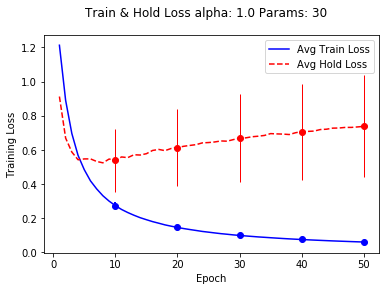

In [4]:
# Plot Train and Hold Loss
helper.create_train_plot(epochs, trainingErrorList, holdErrorList, 'Train & Hold Loss alpha: ' + str(learning_rate) + ' Params: ' + str(param_num))